# Adsorption isotherms

> K adsorption isotherms in three disctinct soils. 

## Import 

In [401]:
import pandas as pd
import matplotlib.pyplot as plt
import fastcore.all as fc

## VMinteq simulation

### Data loading

In [419]:
fname = '../../_data/k-spiking-isotherms.xlsx'

In [420]:
dfs_sheets = pd.read_excel(fname, skiprows=1, usecols=[1,2,3,4,5], 
                           sheet_name=['LUI', 'SPA', 'TM'])

In [421]:
dfs_sheets['LUI'].head()

,Total dissolved,Total sorbed,Bound to SOM,Bound to Clay,k_titrated
0,0.000002,0.004998,0.000156,0.004843,5
1,0.000003,0.009997,0.000313,0.009684,10
2,0.000005,0.014995,0.000472,0.014523,15
3,0.000007,0.019993,0.000632,0.019360,20
4,0.000009,0.024991,0.000795,0.024196,25


Merge all sheets in one single data frame:

In [422]:
dfs = []
for key, df_sheet in dfs_sheets.items():
    df_sheet['soil'] = key
    dfs.append(df_sheet)
    
df = pd.concat(dfs, ignore_index=True)
df.head()

,Total dissolved,Total sorbed,Bound to SOM,Bound to Clay,k_titrated,soil
0,0.000002,0.004998,0.000156,0.004843,5,LUI
1,0.000003,0.009997,0.000313,0.009684,10,LUI
2,0.000005,0.014995,0.000472,0.014523,15,LUI
3,0.000007,0.019993,0.000632,0.019360,20,LUI
4,0.000009,0.024991,0.000795,0.024196,25,LUI


### Data preprocessing

In [423]:
# convert to cmol/kg
gvm = 20 # Gravimetric Moisture Content in %

In [424]:
# k_titrated in mmol/L while all others in mol/l
def to_cmol_kg(concentration, factor=1e-1, gvm=20): 
    return (concentration*factor)/(100/gvm)

In [425]:
df.columns

Index(['Total dissolved', 'Total sorbed', 'Bound to SOM', 'Bound to Clay',
       'k_titrated', 'soil'],
      dtype='object')

In [426]:
df[df['soil'] == 'LUI']

,Total dissolved,Total sorbed,Bound to SOM,Bound to Clay,k_titrated,soil
0,0.000002,0.004998,0.000156,0.004843,5,LUI
1,0.000003,0.009997,0.000313,0.009684,10,LUI
2,0.000005,0.014995,0.000472,0.014523,15,LUI
3,0.000007,0.019993,0.000632,0.019360,20,LUI
4,0.000009,0.024991,0.000795,0.024196,25,LUI
5,0.000011,0.029989,0.000960,0.029029,30,LUI
6,0.000014,0.034986,0.001126,0.033860,35,LUI
7,0.000016,0.039984,0.001295,0.038689,40,LUI
8,0.000018,0.044982,0.001466,0.043516,45,LUI
9,0.000021,0.049979,0.001639,0.048340,50,LUI


In [427]:
100*0.28/5

5.6000000000000005

In [428]:
from functools import partial

In [429]:
df['k_titrated'] = df['k_titrated'].apply(partial(to_cmol_kg, factor=1e-1))
coi = df.columns[:-2]
df[coi] = df[coi].apply(partial(to_cmol_kg, factor=1e2))

In [430]:
df

,Total dissolved,Total sorbed,Bound to SOM,Bound to Clay,k_titrated,soil
0,3.425800e-05,0.099966,0.003111,0.096854,0.1,LUI
1,6.993000e-05,0.199930,0.006255,0.193674,0.2,LUI
2,1.071000e-04,0.299900,0.009434,0.290460,0.3,LUI
3,1.458700e-04,0.399860,0.012649,0.387200,0.4,LUI
4,1.863400e-04,0.499820,0.015901,0.483920,0.5,LUI
5,2.286200e-04,0.599780,0.019191,0.580580,0.6,LUI
6,2.728400e-04,0.699720,0.022522,0.677200,0.7,LUI
7,3.191400e-04,0.799680,0.025896,0.773780,0.8,LUI
8,3.676800e-04,0.899640,0.029314,0.870320,0.9,LUI
9,4.185800e-04,0.999580,0.032776,0.966800,1.0,LUI


### Plotting isotherms

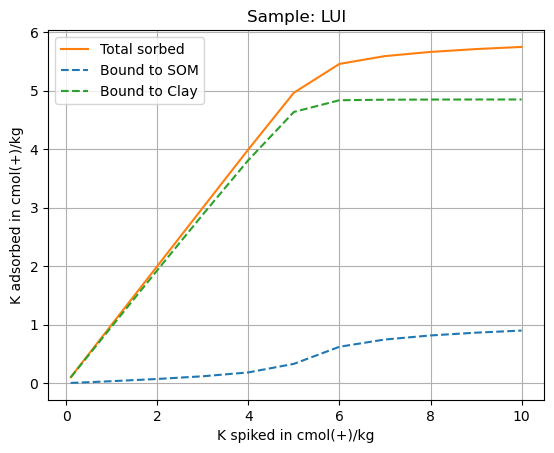

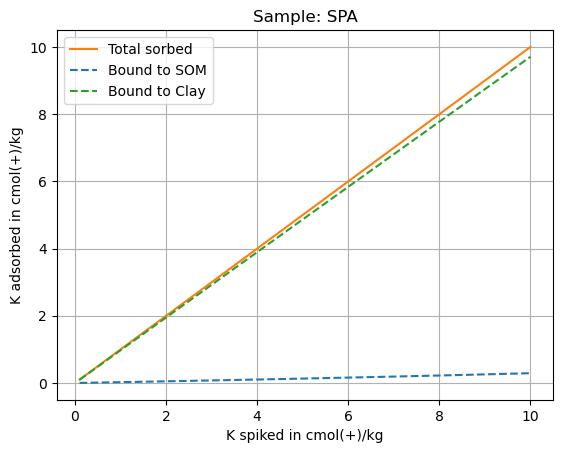

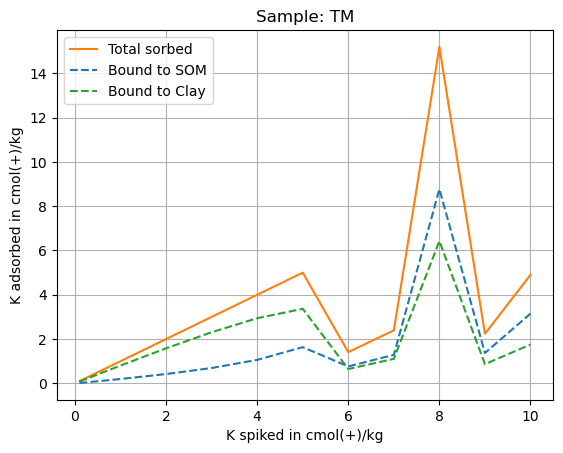

In [442]:
for s in ['LUI', 'SPA', 'TM']:
    data = df[df.soil == s]

    columns_to_plot = ['Total sorbed', 'Bound to SOM', 'Bound to Clay']
    
    colors = ['tab:orange', 'tab:blue', 'tab:green']
    #line_styles = ['-', '--', ':']
    line_styles = ['-', '--', '--']
    
    fig, ax = plt.subplots()
    for col, color, line_style in zip(columns_to_plot, colors, line_styles):
        ax.plot(data['k_titrated'], data[col], color=color, linestyle=line_style, label=col)
    
    plt.xlabel('K spiked in cmol(+)/kg') 
    plt.ylabel('K adsorbed in cmol(+)/kg') 
    plt.grid(True)
    ax.legend()
    ax.set_title(f'Sample: {s}')

## Lab's measurements

Amount of K spiked vs. K measured (ICP-OES).

### Data loading

In [402]:
MOLAR_MASSES = {
    'K': 39.0983,
    'Cl': 35.4527,
    'KCl': 74.56 # according to manufacturer
}

lut_dilution = fc.load_pickle('../../_data/dilution.pkl')
icp_oes_label = fc.load_pickle('../../_data/icp_oes_label.pkl')

In [403]:
fname = '../../_data/20231017 Frank NH4 acetate exchange.xlsx'
df = pd.read_excel(fname, skiprows=12, header=None)

df = df.iloc[:, [1, 5]]
df.columns = ['id', 'K (mg/L)']

df['id'] = pd.to_numeric(df['id'], errors='coerce')
df = df[df['id'].notna()]
df['id'] = df['id'].astype(int); df.head()

,id,K (mg/L)
0,1,0.021667
1,2,0.037564
2,3,0.831728
3,4,0.814559
4,5,1.231517


In [404]:
icp_oes_label.extend([('BLANCO_1', 1), ('BLANCO_2', 2)])
df['label'] = df['id'].map({b: a for a, b in icp_oes_label})
df = df[~df['label'].isin(['BLANCO_1', 'BLANCO_2'])]
df.head()

,id,K (mg/L),label
2,3,0.831728,L0-1
3,4,0.814559,L0-2
4,5,1.231517,S0-1
5,6,1.274201,S0-2
6,7,0.804076,T0-1


In [405]:
def get_cmol_K(k_ppm, volume=0.025): return k_ppm * 100 * volume / MOLAR_MASSES['K']

def to_cmol_kg(row, lut_dilution=lut_dilution):
    smp_id = row['label'].split('-')[0]
    dilution_factor = lut_dilution[smp_id]
    return get_cmol_K(row['K (mg/L)']*dilution_factor)

In [406]:
# Initial K (in cmol(+)/kg)
k_spa = 1.85
k_lui = 0.11
k_tm = 0.5

In [407]:
df['K measured (cmol/kg)'] = df.apply(to_cmol_kg, axis=1)
df.drop(['K (mg/L)'], axis=1, inplace=True, )
df.head()

,id,label,K measured (cmol/kg)
2,3,L0-1,0.053182
3,4,L0-2,0.052084
4,5,S0-1,1.574898
5,6,S0-2,1.629484
6,7,T0-1,0.514137


In [408]:
df['smp_name'] = df['label'].map(lambda x: x.split('-')[0])

In [409]:
smp_name = ['LUI-0', 'LUI-1', 'LUI-2', 'LUI-3',
            'SPA1-0', 'SPA1-1', 'SPA1-2', 'SPA1-3',
            'TM4.1-0', 'TM4.1-1', 'TM4.1-2', 'TM4.1-3']

In [410]:
df.head()

,id,label,K measured (cmol/kg),smp_name
2,3,L0-1,0.053182,L0
3,4,L0-2,0.052084,L0
4,5,S0-1,1.574898,S0
5,6,S0-2,1.629484,S0
6,7,T0-1,0.514137,T0


In [411]:
df_measured = df[['K measured (cmol/kg)', 'smp_name']].groupby('smp_name').mean()
df_measured.head()

,K measured (cmol/kg)
smp_name,
L0,0.052633
L1,0.120278
L2,0.557428
L3,8.808574
S0,1.602191


In [412]:
get_smp_name = lambda x: [f'{x}{d}' for d in [0, 1, 2, 3]]
get_spiked_K_amount = lambda x: [x + d for d in [0, 0.1, 1, 10]]

data = []
for smp_prefix, init_k in [('L', k_lui), ('S', k_spa), ('T', k_tm)]:
    data.extend(list(zip(get_smp_name(smp_prefix), get_spiked_K_amount(init_k))))

df_spiked = pd.DataFrame(data, columns=['smp_name', 'K spiked (cmol/kg)']).set_index('smp_name')
df_spiked

,K spiked (cmol/kg)
smp_name,
L0,0.11
L1,0.21
L2,1.11
L3,10.11
S0,1.85
S1,1.95
S2,2.85
S3,11.85
T0,0.50


In [413]:
df_measured_vs_spiked = df_measured.join(df_spiked); df_measured_vs_spiked

,K measured (cmol/kg),K spiked (cmol/kg)
smp_name,,
L0,0.052633,0.11
L1,0.120278,0.21
L2,0.557428,1.11
L3,8.808574,10.11
S0,1.602191,1.85
S1,1.752982,1.95
S2,2.544179,2.85
S3,9.720309,11.85
T0,0.513927,0.50


In [414]:
df_measured_vs_spiked.reset_index(inplace=True)

In [415]:
df_measured_vs_spiked['smp_name'] = df_measured_vs_spiked['smp_name'].apply(lambda x: x[0])

In [416]:
print(df_measured_vs_spiked)

   smp_name  K measured (cmol/kg)  K spiked (cmol/kg)
0         L              0.052633                0.11
1         L              0.120278                0.21
2         L              0.557428                1.11
3         L              8.808574               10.11
4         S              1.602191                1.85
5         S              1.752982                1.95
6         S              2.544179                2.85
7         S              9.720309               11.85
8         T              0.513927                0.50
9         T              0.588390                0.60
10        T              1.123894                1.50
11        T              8.541135               10.50


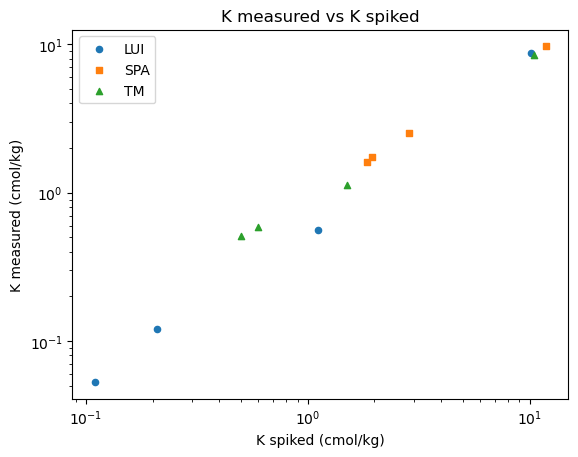

In [417]:
import matplotlib.pyplot as plt
import numpy as np

# Create a dictionary to map smp_name to labels
labels = {'L': 'LUI', 'S': 'SPA', 'T': 'TM'}

df = df_measured_vs_spiked.copy()

# Map smp_name to labels
df['smp_name'] = df['smp_name'].map(labels)

# Create a list of colors for each label
colors = ['tab:blue', 'tab:orange', 'tab:green']
markers = ['o', 's', '^']

# Create the scatterplot
for i, label in enumerate(labels.values()):
    subset = df[df['smp_name'] == label]
    plt.scatter(subset['K spiked (cmol/kg)'], subset['K measured (cmol/kg)'], 
                label=label, color=colors[i], marker=markers[i], s=20)

# Set the plot title and labels
plt.title('K measured vs K spiked')
plt.xlabel('K spiked (cmol/kg)')
plt.ylabel('K measured (cmol/kg)')

plt.xscale('log')
plt.yscale('log')
#plt.grid(True)

# Add a legend
plt.legend()